In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/imdb-india-movies/IMDb Movies India.csv


In [2]:
import pandas as pd
!pip install chardet

  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 3.7 MB/s eta 0:00:00


In [3]:
import chardet
with open('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', 'rb') as f:
    result = chardet.detect(f.read())

In [4]:
df = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding=result['encoding'])

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.shape

(15509, 10)

In [9]:
df.shape

(15509, 10)

In [10]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [11]:
def basic_valid(column,df=df):
    print("These is some basic information on our dataset\n")
    print(f"There are a total of {df.nunique() }|unique elements in {column}\n")
    print(f"The elements in |{column} in order of frequency appearance are \n {df.value_counts().head(10)}")

In [12]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [13]:
for column in df.columns :
    if column in ['Rating']:
        pass 
    else :
        basic_valid(column)

These is some basic information on our dataset

There are a total of Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64|unique elements in Name

The elements in |Name in order of frequency appearance are 
 Name                                Year    Duration  Genre                      Rating  Votes  Director          Actor 1            Actor 2           Actor 3             
#Gadhvi (He thought he was Gandhi)  (2019)  109 min   Drama                      7.0     8      Gaurav Bakshi     Rasika Dugal       Vivek Ghamande    Arvind Jangid           1
Naya Andaz                          (1956)  142 min   Romance                    5.8     12     K. Amarnath       Kishore Kumar      Meena Kumari      Kumkum                  1
Number Game                         (2018)  117 min   Horror, Mystery, Thriller  6.3     10     Sumit Sinha       Aishwaryaa R

In [14]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [15]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [16]:
df.dropna(axis=0,inplace=True)

DATA ANALYSIS

In [17]:
# Lets create a data analysis model 

class DataAnalyst:
    def __init__(self,df,hue):
        self.df = df 
        self.hue = None
    def plot_histplot(self,x,df):
        plt.figure(figsize=(20,8))
        sns.histplot(x=x,data=df)
        plt.xlabel(x)
        plt.ylabel("Total Frequency")
        plt.show()
    def plot_countplot(self,x,df,hue):
        plt.figure(figsize=(20,8))
        sns.countplot(x=x,data=df,hue=hue)
        plt.xlabel(x)
        plt.ylabel(f"Total count of {x}")
        plt.title(f"A countplot showing the distribution of{x}")
        plt.show()
    def plot_barplot(self,x,y,df,hue=None):
        plt.figure(figsize=(20,8))
        sns.barplot(x=x,y=y,data=df,hue=hue)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f"A Barplot showing the distribution of {x} and {y}")
        plt.show()
    def plot_jointplot(self,x,y,df):
        plt.figure(figsize=(20,8))
        sns.jointplot(x=x,y=y,data=df)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f"Joint Plot showing Relationship between {x} and {y}")
        plt.show()
        
        
        

In [18]:
analyst = DataAnalyst(df=df,hue=None)

# DATA PROCESSING AND ANALYSIS 

Before I do my data analysis I am required to work on my data ,for example If I check my data types these are the results .

* Column       Datatype
* Name       :  object
* Year       :  object
* Duration    : object
* Genre      :  object
* Rating     : float64
* Votes      :  object
* Director    : object
* Actor 1     : object
* Actor 2     : object
* Actor 3     : object

A majority of my columns are of the object datatype . This will prove difficult to analyze for columns such as Year ,Duration and Votes which are supposed to be intergers. 

In [19]:
df['Year'] = df['Year'].str.extract('(\d+)')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
# After extracting the numeric part  of the string we convert it to numeric

In [20]:
df['Year'].value_counts().head()

Year
2019    227
2017    211
2018    202
2015    177
2016    173
Name: count, dtype: int64

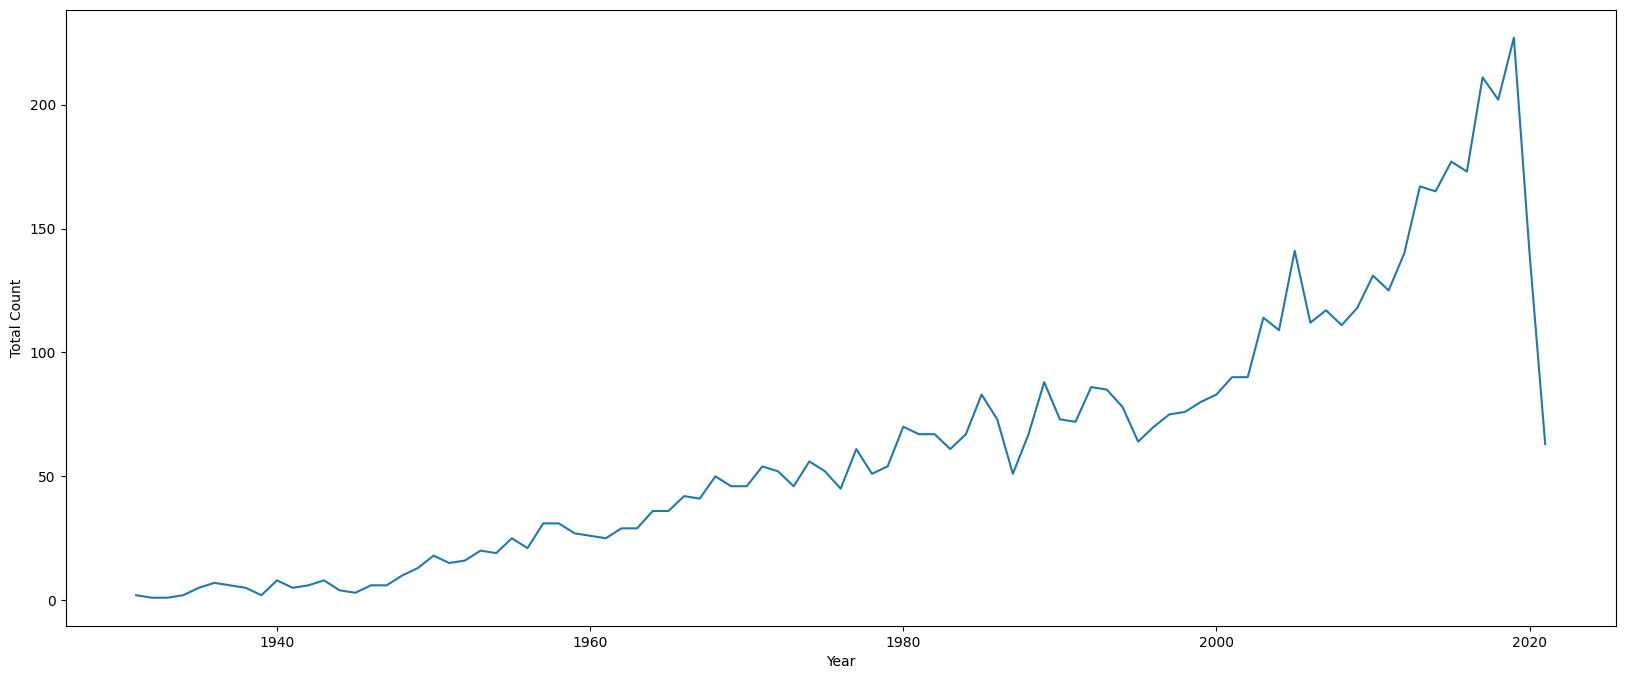

In [21]:
# Movie release over the year 
plt.figure(figsize=(20,8))
sns.lineplot(data=df['Year'].value_counts().sort_index())
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.show()

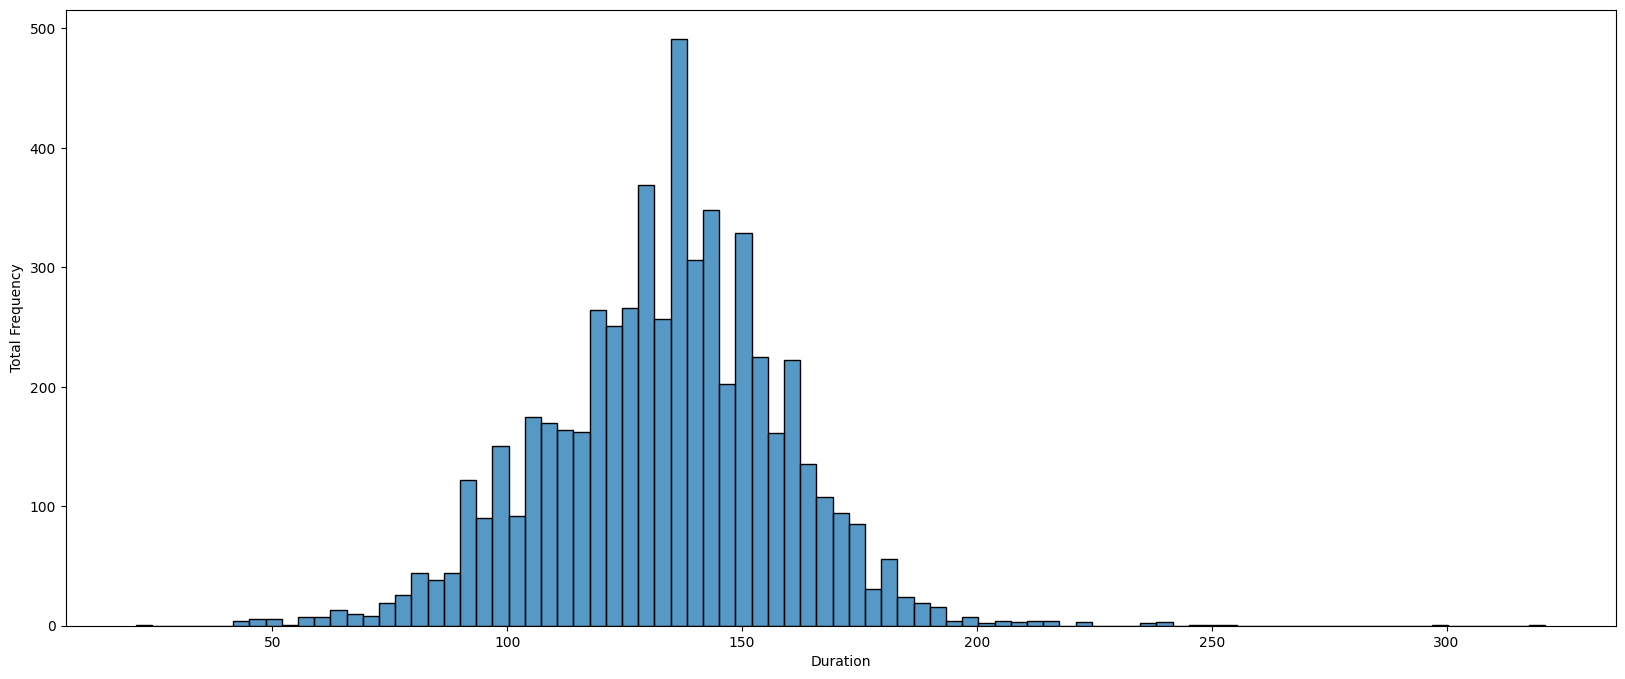

In [22]:
#  How are the movies distributed according to their duration
analyst.plot_histplot("Duration",df=df)

<Figure size 2000x800 with 0 Axes>

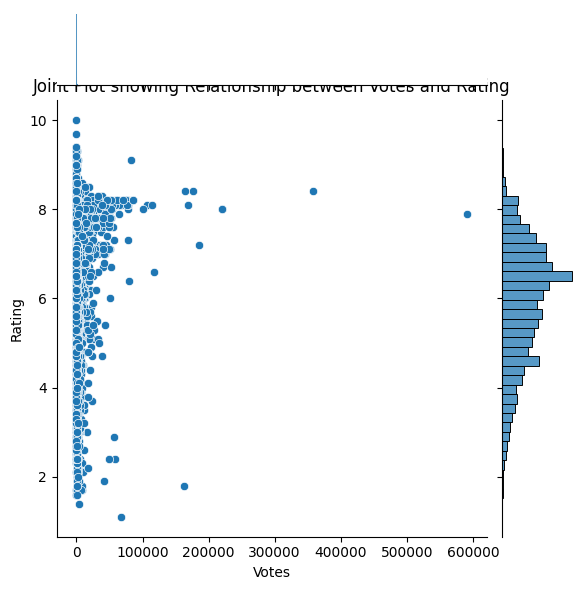

In [23]:
analyst.plot_jointplot(x='Votes',y = 'Rating',df=df)

In [24]:
df['Genre'].value_counts().head(20) # The dataset has a majority od drama movies

Genre
Drama                      844
Drama, Romance             332
Action, Crime, Drama       329
Action, Drama              206
Comedy, Drama              205
Comedy, Drama, Romance     188
Comedy                     187
Action                     170
Drama, Family              160
Romance                    126
Action, Comedy, Drama      118
Comedy, Romance            107
Action, Drama, Romance     107
Drama, Musical, Romance     93
Thriller                    84
Action, Comedy, Crime       74
Horror                      74
Action, Thriller            70
Comedy, Crime, Drama        53
Crime, Drama, Thriller      53
Name: count, dtype: int64

<Figure size 2000x800 with 0 Axes>

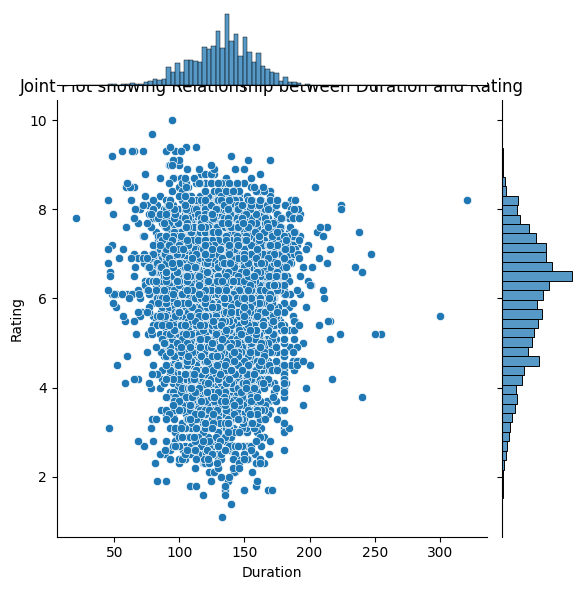

In [25]:
analyst.plot_jointplot(x="Duration",y='Rating',df=df)

<Figure size 2000x800 with 0 Axes>

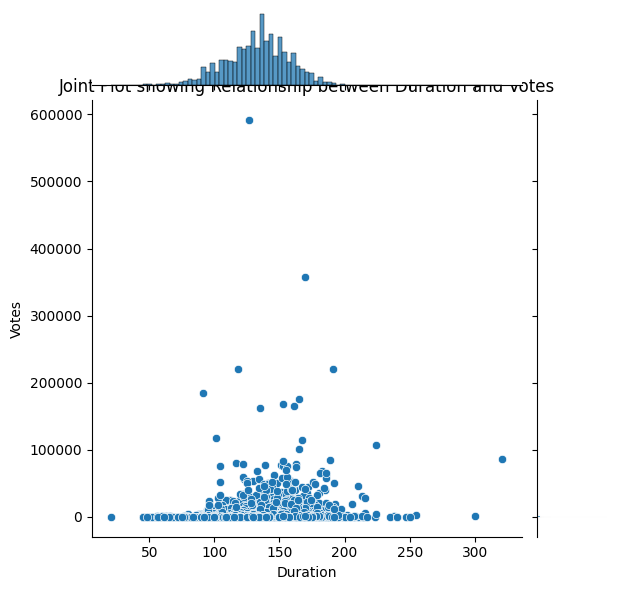

In [26]:
analyst.plot_jointplot(x="Duration",y='Votes',df=df)

In [27]:
# Checking for correlation between variables
correlation = df[['Votes','Rating','Year','Duration']].corr()
correlation

,Votes,Rating,Year,Duration
Votes,1.000000,0.142563,0.129749,0.097621
Rating,0.142563,1.000000,-0.204642,0.001839
Year,0.129749,-0.204642,1.000000,-0.327567
Duration,0.097621,0.001839,-0.327567,1.000000


<Figure size 2000x800 with 0 Axes>

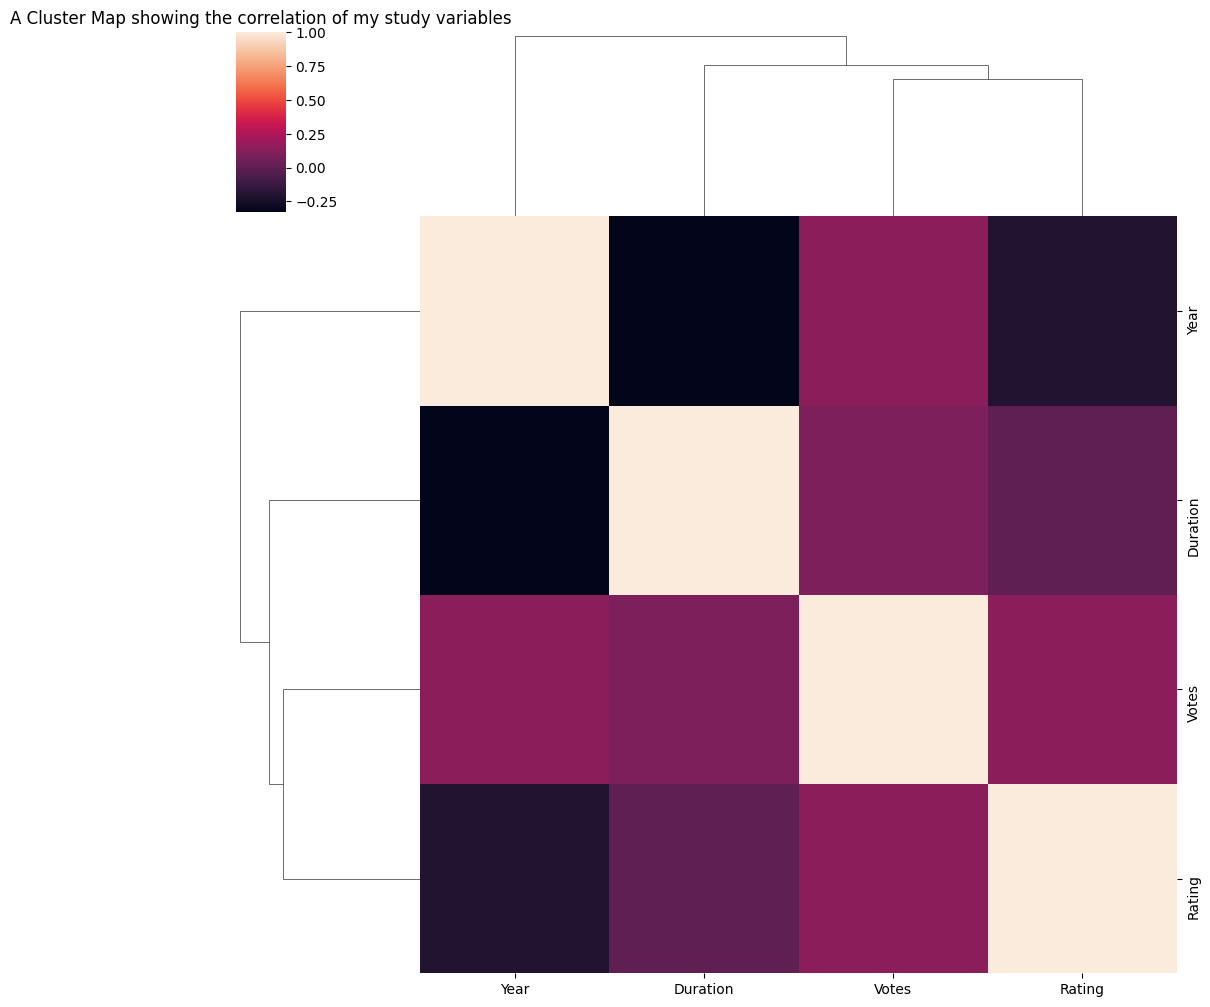

In [28]:
fig = plt.figure(figsize=(20,8))
sns.clustermap(correlation)
plt.title("A Cluster Map showing the correlation of my study variables")
plt.show()

* FEATURE SELECTION 

In [29]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [30]:
X = df.drop(['Director','Actor 1','Actor 2','Actor 3','Name','Year','Genre'],axis=1)
y = df['Year']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4122023)

In [33]:
print(X_train.shape,y_train.shape)

(4527, 3) (4527,)


***MACHINE LEARNING REGRESSION*** : Lasso Regression

What is Lasso Regression ?
LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. 
LASSO stands for Least Absolute Shrinkage and Selection Operator.
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

Lasso's ability to perform subset selection relies on the form of the constraint and has a variety of interpretations.

In Machine Learning  Lasso algorithm used to fit the model is coordinate descent.
X argument of the fit method should be directly passed as a Fortran-contiguous numpy array to avoid unnecessary memory duplication  .

Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization ,the primary goal of LASSO regression is to find a balance between model simplicity and accuracy. It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero. This feature makes LASSO particularly useful for feature selection, as it can automatically identify and discard irrelevant or redundant variables.

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [35]:
lasso = Lasso()
lasso.fit(X_train,y_train)
predictions = lasso.predict(X_test)


In [36]:
print(f"The mean squared error for the lasso model is {mean_squared_error(y_test,predictions)}")
print(f"The mean absolute error for the lasso model is {mean_absolute_error(y_test,predictions)}")

The mean squared error for the lasso model is 294.27948857650034
The mean absolute error for the lasso model is 14.17216124271229


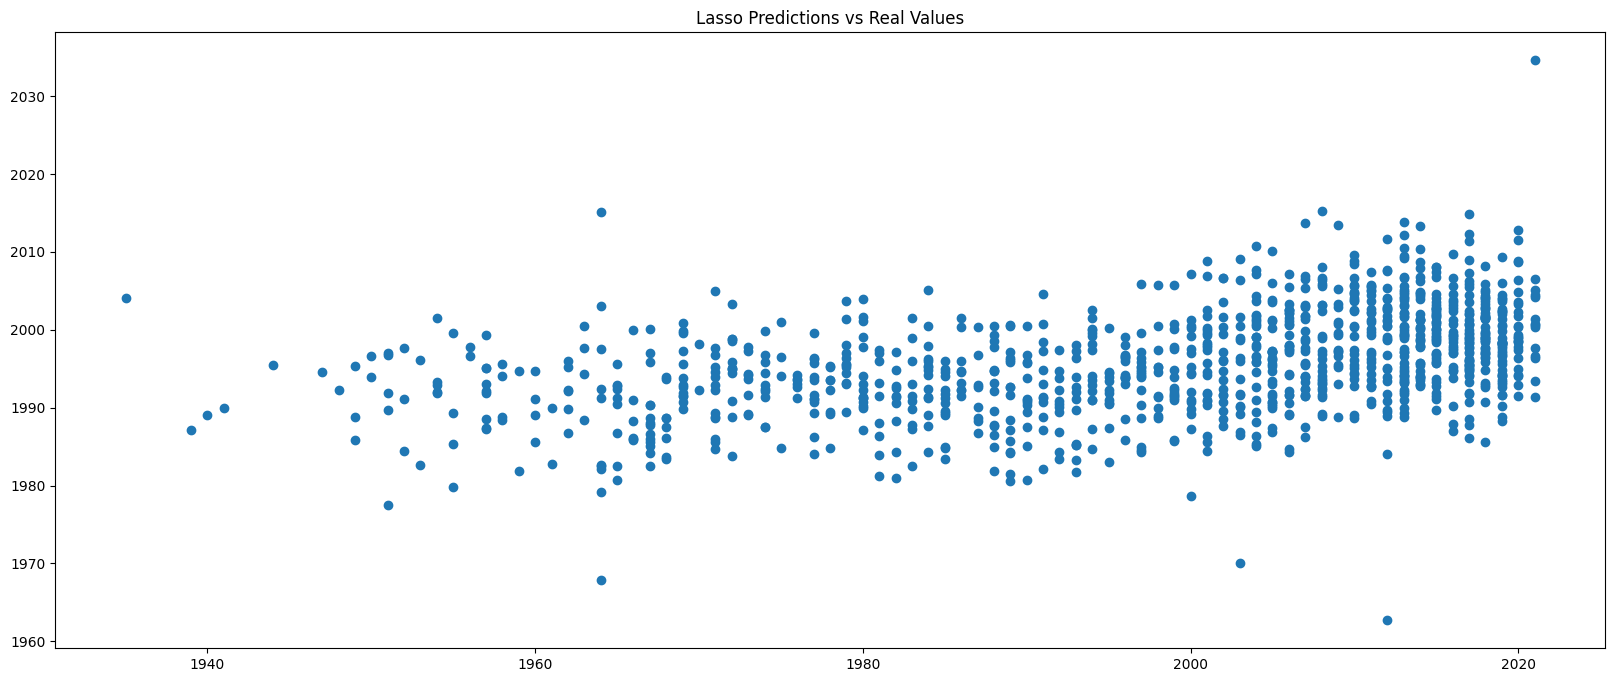

In [37]:
fig = plt.figure(figsize=(20,8))
plt.scatter(y_test,predictions)
plt.title("Lasso Predictions vs Real Values")
plt.show()

REFERENCES :

https://en.wikipedia.org/wiki/Lasso_(statistics)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/